# Imports

In [379]:
import spotipy
import pandas as pd
import numpy as np
import time
import requests
import re
import operator
import os
import eyed3
import urllib
import urllib.parse
import lxml.html
import pyprind
import lyricsgenius
import nltk
import spacy
import en_core_web_sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import lyricwikia
import string
import seaborn as sns
from nltk.corpus import  words, stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from spotipy.oauth2 import SpotifyClientCredentials
from wordcloud import WordCloud
from ast import literal_eval
from nrclex import NRCLex
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelahalim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/michaelahalim/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelahalim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelahalim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Collection and Cleaning

In [ ]:
# This cell is used to access the spotify API. You would need to create an account from the website below.
# https://developer.spotify.com/documentation/general/guides/app-settings/#register-your-app
client_id = 'YOUR CLIENT ID HERE'
client_secret = 'YOUR CLIENT SECRET HERE'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
# This method will be used to get assign the name of the song with a rating
# Result will be like (songName, rating)
def getOrder(user, playlist_id):
    song=[]
    playlist = sp.user_playlist(user, playlist_id)
    for item in playlist['tracks']['items']:
        songName = sp.track(item['track']['id'])['name']
        song.append(songName)
    return enumerate(song, 1)

# This function will only be used for songs that people are listening to now
spotifyMusic = list(getOrder('michaelahalim', '3WxTnGherpf7t4F0VzchD4'))
appleMusic = list(getOrder('michaelahalim', '4IVJtFc5ObtHrH3dUDI0rm'))
amazonMusic = list(getOrder('michaelahalim', '6Ju5S6vEP79NGIMozpgjbh'))
pandoraMusic = list(getOrder('michaelahalim', '6e9xLnk6djC0RwymfcoOUN'))

In [2]:
# This method is used to extract song information from each playlist by using Spotipy Library
# Spotify spotify:playlist:0jYCAQXHDI77vKl6ym1Y3E
# Apple spotify:playlist:4IVJtFc5ObtHrH3dUDI0rm
# Amazon spotify:playlist:6Ju5S6vEP79NGIMozpgjbh
# Pandora spotify:playlist:6e9xLnk6djC0RwymfcoOUN
# 1918 spotify:playlist:5CcNAynCqoMoNBEu4CMTs0
# WorldWar spotify:playlist:0MGNFs4NEIAoAAxbl7vSBb
def getSong(user, playlist_id):
    data = {'rating': [], 'songName': [], 'artistName': [], 'genre': []}
    playlist = sp.user_playlist(user, playlist_id)
    for rating, item in enumerate(playlist['tracks']['items'], 34):
        artistArr = []
        artistIDArr = []
        genres = []
        song = sp.track(item['track']['id'])['name']
        print(song)
        if song in data['songName']:
            break
        artists = sp.track(item['track']['id'])['artists']
        for index in range(len(artists)):
            artistName = sp.track(item['track']['id'])['artists'][index]['name']
            artistID = sp.track(item['track']['id'])['artists'][index]['id']
            artistArr.append(artistName)
            artistIDArr.append(artistID)
        for artistID in artistIDArr:
            auth = {'Authorization': 
                    "YOUR AUTHORIZATION BEARER CODE"}
            endpoint = 'https://api.spotify.com/v1/artists/' + artistID
            response = requests.get(endpoint, headers=auth)
            response = response.json()
            if 'error' in response:
                print(response['error']['message'], rating, song)
                break
            if 'genres' in response:
                genreReq = response['genres']
                for genre in genreReq:
                    genres.append(genre)
            else:
                print(response)
        data['rating'].append(rating)
        data['songName'].append(song)
        data['artistName'].append(artistArr)
        data['genre'].append(genres)
    return data

In [ ]:
# Getting the data using spotify playlist's unique ID
# getSong(spotify username, unique playlist id)
pandemicMusic = getSong('michaelahalim', '5CcNAynCqoMoNBEu4CMTs0')
worldMusic = getSong('michaelahalim', '0MGNFs4NEIAoAAxbl7vSBb')
spotify = getSong('michaelahalim', '0jYCAQXHDI77vKl6ym1Y3E')
apple = getSong('michaelahalim', '4IVJtFc5ObtHrH3dUDI0rm')
amazon = getSong('michaelahalim', '6Ju5S6vEP79NGIMozpgjbh')
pandora = getSong('michaelahalim', '6e9xLnk6djC0RwymfcoOUN')

In [ ]:
# Create dataframe for each respective data from the previous cell
dfpandemicMusic = pd.DataFrame.from_dict(pandemicMusic, orient='columns')
dfpandemicMusic = dfpandemicMusic[['rating', 'songName', 'artistName', 'genre']]

dfworldMusic = pd.DataFrame.from_dict(worldMusic, orient='columns')
dfworldMusic = dfworldMusic[['rating', 'songName', 'artistName', 'genre']]

dfSpotify = pd.DataFrame.from_dict(spotify, orient='columns')
dfSpotify = df[['rating', 'songName', 'artistName', 'genre']]

dfApple = pd.DataFrame.from_dict(apple, orient='columns')
dfApple = df[['rating', 'songName', 'artistName', 'genre']]

dfAmazon = pd.DataFrame.from_dict(amazon, orient='columns')
dfAmazon = df[['rating', 'songName', 'artistName', 'genre']]

dfPandora = pd.DataFrame.from_dict(pandora, orient='columns')
dfPandora = df[['rating', 'songName', 'artistName', 'genre']]

# Save to CSV to create backup without saving the index
dfPandora.to_csv('pandora.csv', index=False)
dfApple.to_csv('apple.csv', index=False)
dfAmazon.to_csv('amazon.csv', index=False)
dfSpotify.to_csv('spotify.csv', index=False)
dfworldMusic.to_csv('worldMusicbase.csv', index=False)
dfpandemicMusic.to_csv('worldMusicbase.csv', index=False)

In [ ]:
# This cell is used to determine the order of the songs and find union of the 4 songs
songOrder = {}
songOrderCopy = {}
def addOrder(music):
    for song in music:
        if song[1] in songOrder:
            songOrder[song[1]].append(song[0])
        else:
            songOrder[song[1]] = [song[0]]
    for song in music:
        if song[1] in songOrderCopy:
            songOrderCopy[song[1]] = songOrderCopy[song[1]] + song[0]
        else:
            songOrderCopy[song[1]] = song[0]
    
#spotifyMusic, appleMusic, pandoraMusic, amazonMusic
addOrder(spotifyMusic)
addOrder(appleMusic)
addOrder(pandoraMusic)
addOrder(amazonMusic)

finalizedSong = {}
# Get songs if there exist at least 2 intersection of song between any of the 4 music services
for song in songOrder:
    length = len(songOrder[song])
    if length == 1:
        continue
    finalizedSong[song] = songOrderCopy[song] / length
# Sort songs based on the one with a higher rating
finalizedSong = sorted(finalizedSong.items(), key=operator.itemgetter(1))
print(finalizedSong)

In [ ]:
finalDataCurrent = {'rating': [], 'songName': [], 'artistName': [], 'genre': []}
for song in finalizedSong:
    finalDataCurrent['rating'].append(song[1])
    finalDataCurrent['songName'].append(song[0])
    if song[0] in spotify['songName']:
        index = spotify['songName'].index(song[0])
        finalDataCurrent['artistName'].append(spotify['artistName'][index])
        finalDataCurrent['genre'].append(spotify['genre'][index])
    elif song[0] in amazon['songName']:
        index = amazon['songName'].index(song[0])
        finalDataCurrent['artistName'].append(amazon['artistName'][index])
        finalDataCurrent['genre'].append(amazon['genre'][index])
    elif song[0] in apple['songName']:
        index = apple['songName'].index(song[0])
        finalDataCurrent['artistName'].append(apple['artistName'][index])
        finalDataCurrent['genre'].append(apple['genre'][index])
    elif song[0] in pandora['songName']:
        index = pandora['songName'].index(song[0])
        finalDataCurrent['artistName'].append(pandora['artistName'][index])
        finalDataCurrent['genre'].append(pandora['genre'][index])

In [ ]:
# This cell is mainly used for extracting the lyrics from the genius API
dfSongs = pd.DataFrame.from_dict(finalDataCurrent, orient='columns')
dfSongs = dfSongs[['rating', 'songName', 'artistName', 'genre']]
dfSongs.to_csv('songsCurrent.csv',index=False)
dfSongs['lyrics'] = pd.Series('', index=df.index)
dfSongs.tail()

# Clean Feat from songName
for row_id in dfSongs.index:
    text = dfSongs.loc[row_id]['songName']
    dfSongs.loc[row_id, 'songName'] = re.sub("\s\([\w|\s|.|\-|,|]+\)", "", text)

genius = lyricsgenius.Genius("YOUR GENIUS API KEY")
for row_id in dfSongs.index:
    artist = dfSongs.loc[row_id]['artistName'][0]
    title = dfSongs.loc[row_id]['songName']
    if artist == 'HIXTAPE':
        artist = 'HARDY'
    song = genius.search_song(title, artist)
    dfSongs.loc[row_id,'lyrics'] = song.lyrics

print('downloaded Lyrics for %s songs' %sum(dfSongs.lyrics!=''))

def eng_ratio(text):
    english_vocab = set(w.lower() for w in nltk.corpus.words.words()) 
    text_vocab = set(w.lower() for w in text.split() if w.lower().isalpha()) 
    unusual = text_vocab.difference(english_vocab)
    diff = len(unusual)/len(text_vocab)
    return diff

before = dfSongs.shape[0]
for row_id in dfSongs.index:
    text = dfSongs.loc[row_id]['lyrics']
    diff = eng_ratio(text)
    if diff >= 0.5:
        dfSongs = dfSongs[dfSongs.index != row_id]
after = dfSongs.shape[0]
rem = before - after
print('%s have been removed.' %rem)
print('%s songs remain in the dataset.' %after)

# Clean Intro, Verse, Chorus, etc from lyrics
for row_id in songs.index:
    text = songs.loc[row_id]['lyrics']
    songs.loc[row_id, 'lyrics'] = re.sub("\[[\w|\-|\&|\.|\,|\:|\s|é]+\]", "", text)

dfSongs.to_csv('finalizedSongwithLyricsENGLISH.csv')

In [53]:
# I have previously creaeted a csv file and I am reading where I left off.
world = pd.read_csv('world1.csv', converters={'artistName': eval})
pandemic = pd.read_csv('pandemic1.csv', converters={'artistName': eval})

In [54]:
# Adding the lyrics column into the dataframe
pandemic['lyrics'] = pd.Series('', index=pandemic.index)
world['lyrics'] = pd.Series('', index=world.index)

In [ ]:
# Dropping Duplicates of Songs
pandemic = pandemic.drop_duplicates(subset='songName')
world = world.drop_duplicates(subset='songName')

In [47]:
# This cell is used to add lyrics to the World War Song Dataframe. For songs with no lyrics associated in
# the genius API, the title will be appended to the noLy2 array where I will then proceed to manually add
# the lyrics of the respective song from excel by searching it in Google through various websites. After
# saving it to a new csv file at the end of this cell.
noLy2 = []
genius = lyricsgenius.Genius("YOUR GENIUS API KEY")
for row_id in world.index:
    artist = world.loc[row_id]['artistName'][0]
    title = world.loc[row_id]['songName']
    try:
        lyrics = lyricwikia.get_lyrics(artist, title)
        world.loc[row_id,'lyrics'] = lyrics
    except:
        noLy2.append(title)
        
# Save the data to a new csv file. 
world.to_csv('world2.csv', index=False)

In [56]:
# This cell is used to add lyrics to the pandemic Dataframe. For songs with no lyrics associated in
# the genius API, the title will be appended to the noLy array where I will then proceed to manually add
# the lyrics of the respective song from excel by searching it in Google through various websites. After
# saving it to a new csv file at the end of this cell.
noLy = []
genius = lyricsgenius.Genius("YOUR GENIUS API KEY")
for row_id in pandemic.index:
    artist = pandemic.loc[row_id]['artistName'][0]
    title = pandemic.loc[row_id]['songName']
    try:
        lyrics = lyricwikia.get_lyrics(artist, title)
        pandemic.loc[row_id,'lyrics'] = lyrics
    except:
        noLy.append(title)
        
pandemic.to_csv('pandemic2.csv', index=False)

# Loading Data for Visualization

In [66]:
# Loading the songs people listen to now into a new data frame
nSongs = pd.read_csv('finalizedSongwithLyricsENGLISH.csv', converters={'rating': eval, 'artistName': eval, 'genre': eval})
nSongs.head()

s         songName                  artistName  \
0   1.000000         ROCKSTAR       [DaBaby, Roddy Ricch]   
1   3.333333  Blinding Lights                [The Weeknd]   
2   5.250000     Toosie Slide                     [Drake]   
3  10.333333     Dance Monkey               [Tones And I]   
4  10.750000       Rain On Me  [Lady Gaga, Ariana Grande]   

                                               genre  \
0                [nc hip hop, rap, melodic rap, rap]   
1     [canadian contemporary r&b, canadian pop, pop]   
2  [canadian hip hop, canadian pop, hip hop, pop ...   
3                                   [australian pop]   
4    [dance pop, pop, dance pop, pop, post-teen pop]   

                                              lyrics  
0  \nWoo, woo\nI pull up like\nHow you pull up, B...  
1  \nYeah\n\n\nI've been tryna call\nI've been on...  
2  \nBlack leather glove, no sequins\nBuckles on ...  
3  \nThey say, "Oh my God, I see the way you shin...  
4  \nI didn't ask for a free ride\nI only asked y...

In [67]:
# Loading the songs people listen to during 1918 pandemic into a new data frame
pSongs = pd.read_csv('pandemic2.csv', encoding='latin-1')
pSongs.head()

songName           artistName  \
0              Just a Baby's Prayer at Twilight       ['Henry Burr']   
1      Rock-A-Bye Your Baby With A Dixie Melody      ['Jerry Lewis']   
2  I'm Always Chasing Rainbows - Single Version     ['Judy Garland']   
3       Oh! How I Hate to Get Up in the Morning      ['Matt Cherne']   
4                Hail, Hail the Gang's All Here  ['Frank 88 Malone']   

                                              lyrics  
0  (Verse)\nI've heard the prayers of mothers\nSo...  
1  Rock-a-bye your baby with a Dixie melody â\n...  
2  I'm always chasing rainbows\nWatching clouds d...  
3  The other day I chanced to meet a soldier frie...  
4  Well the devil's nipping at your heels and thi...

In [170]:
# Loading the songs people listen to during the World War 2 into a new data frame
wSongs = pd.read_csv('world2.csv', encoding='latin-1')
wSongs.head()

songName  \
0  Pistol Packin' Mama - Single Version   
1                            Paper Doll   
2           I've Heard That Song Before   
3                     You'll Never Know   
4              Sunday, Monday Or Always   

                                          artistName  \
0  ['Bing Crosby', 'The Andrews Sisters', 'Vic Sc...   
1                                     ['John Mayer']   
2                                    ['Harry James']   
3                                    ['Dick Haymes']   
4                                    ['Jimmy Scott']   

                                              lyrics  
0  Lay that pistol down, babe\nLay that pistol do...  
1  Paper doll come try it on\nAnd step out of tha...  
2  It seems to me I've heard that song before\nIt...  
3  You'll never know just how much I miss you\nYo...  
4  Oh, won't you tell me when\nWe will meet again...

In [ ]:
# This was originally used for extracting the lyrics from the song but it is no longer used.
# for row_id in songs.index:
#     newGenre = []
#     genres = songs.loc[row_id]['genre']
#     for genre in genres:
#         if 'hip hop' in genre and 'hip hop' not in newGenre:
#             newGenre.append('hip hop')
#             continue
#         if 'indie' in genre and 'indie' not in newGenre:
#             newGenre.append('indie')
#             continue
#         if 'rap' in genre and 'rap' not in newGenre:
#             newGenre.append('rap')
#             continue
#         if 'pop' in genre and 'pop' not in newGenre:
#             newGenre.append('pop')
#             continue
#         if 'country' in genre and 'country' not in newGenre:
#             newGenre.append('country')
#             continue
#         if 'trap' in genre and 'trap' not in newGenre:
#             newGenre.append('trap')
#             continue
#         if 'contemporary' in genre and 'contemporary' not in newGenre:
#             newGenre.append('contemporary')
#             continue
#     songs.at[row_id, 'genre'] = newGenre

In [69]:
# This function is used to add spacy data into the dataframe. This method is credited to sharpie-007 at 
# https://github.com/sharpie-007
def add_spacy_data(dataset, feature_column):
    '''
    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) 
    tokens and pushes them into a new dataset. returns an 
    enriched dataset.
    
    Parameters:
    
    dataset (dataframe): the dataframe to parse
    feature_column (string): the column to parse in the dataset.
    
    Returns: 
    dataframe
    '''
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = en_core_web_sm.load()
    ##
    for i in range (0, len(dataset)):
        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][feature_column]
        doc = nlp(song)
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    return dataset

In [84]:
# This method is used to add word count and unique word counts into the dataframe
def add_word_count(dataframes):
    for dataframe in dataframes:
        word_counts = []
        unique_word_counts = []
        for i in range (0, len(dataframe)):
            word_counts.append(len(dataframe.iloc[i]['lyrics'].split()))
            unique_word_counts.append(len(set(dataframe.iloc[i]['lyrics'].split())))
        dataframe['Word Counts'] = word_counts
        dataframe['Unique Word Counts'] = unique_word_counts

In [168]:
# This method is used to create a txt file of the verbs and nouns in a list of dataframes to be used
# for analysis in overviewdocs
def create_txt(dataframes):
    for dataframe in dataframes:
        print(dataframe.name)
        if dataframe.name == 'now':
            fileName1 = 'verbsN'
            fileName2 = 'nounsN'
        elif dataframe.name == 'world':
            fileName1 = 'verbsW'
            fileName2 = 'nounsW'
        elif dataframe.name == 'pandemic':
            fileName1 = 'verbsP'
            fileName2 = 'nounsP'
        verbs = ''
        nouns = ''
        for verb in dataframe['Verbs']:
            verbs += verb
        for noun in dataframe['Nouns']:
            nouns += noun
        file1 = open(fileName1,"w")
        file1.write(verbs) 
        file2 = open(fileName2,"w")
        file2.write(nouns) 

In [154]:
# This method is used to create a wordcloud of the nouns and verbs from a list of dataframes
def create_wordcloud(dataframes):
    for dataframe in dataframes:
        wcVerb = WordCloud(width = 1000, height = 1000, background_color="white").generate(str(dataframe['Verbs'].values))
        plt.figure(figsize=(20,10), facecolor='black')
        plt.imshow(wcVerb)
        plt.axis("off")
        fileName = dataframe.name + 'Verbs.png'
        plt.savefig(fileName,  facecolor='k', bbox_inches='tight', format="png")
    for dataframe in dataframes:
        wcNoun = WordCloud(width = 1000, height = 1000, background_color="white").generate(str(dataframe['Nouns'].values))
        plt.figure(figsize=(20,10), facecolor='black')
        plt.imshow(wcNoun)
        plt.axis("off")
        fileName = dataframe.name + 'Nouns.png'
        plt.savefig(fileName,  facecolor='k', bbox_inches='tight', format="png")

In [245]:
# This method is used to create stacked bar plot of the emotional analysis found in the dataframe's lyric
def create_emotion_bar(dataframes):
    for dataframe in dataframes:
        data = {'songName': [], 'fear': [], 'anger': [], 'sadness': [], 'disgust': [], 'joy':[]}
        if dataframe.name == 'now':
            fileName1 = 'emotionN'
            title = 'Emotion Analysis of Song in Today\'s Music'
        elif dataframe.name == 'world':
            fileName1 = 'emotionW'
            title = 'Emotion Analysis of Song during World War 2'
        elif dataframe.name == 'pandemic':
            fileName1 = 'emotionP'
            title = 'Emotion Analysis of Song during 1918 Pandemic'
        for row_id in dataframe.index:
            songName = dataframe.loc[row_id]['songName']
            lyrics = dataframe.loc[row_id]['lyrics']
            analysis = NRCLex(lyrics)
            freq = analysis.affect_frequencies
            data['songName'].append(songName)
            data['fear'].append(freq['fear'])
            data['anger'].append(freq['anger'])
            data['sadness'].append(freq['sadness'])
            data['disgust'].append(freq['disgust'])
            data['joy'].append(freq['joy'])

        songsAnalysis = pd.DataFrame.from_dict(data, orient='columns')
        songsAnalysis = songsAnalysis[['songName', 'fear', 'anger', 'sadness', 'disgust', 'joy']]
        for row_id in songsAnalysis.index:
            total = songsAnalysis.loc[row_id, 'fear'] + songsAnalysis.loc[row_id, 'anger'] + songsAnalysis.loc[row_id, 'sadness'] + songsAnalysis.loc[row_id, 'disgust'] + songsAnalysis.loc[row_id, 'joy']
            songsAnalysis.loc[row_id, 'fear'] = songsAnalysis.loc[row_id, 'fear']/total * 100
            songsAnalysis.loc[row_id, 'anger'] = songsAnalysis.loc[row_id, 'anger']/total * 100
            songsAnalysis.loc[row_id, 'sadness'] = songsAnalysis.loc[row_id, 'sadness']/total * 100
            songsAnalysis.loc[row_id, 'disgust'] = songsAnalysis.loc[row_id, 'disgust']/total * 100
            songsAnalysis.loc[row_id, 'joy'] = songsAnalysis.loc[row_id, 'joy']/total * 100

        songsAnalysis.plot(x='songName', kind='bar', stacked=True, figsize=(40,20))
        plt.xticks(rotation=90)
        plt.title(title, fontsize=24)
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)
        plt.legend(fontsize=20, loc=1)
        plt.ylabel("Emotion Frequency in percentage", fontsize=24)
        plt.savefig(fileName1, bbox_inches="tight")

In [70]:
nSongsSpacy = add_spacy_data(nSongs, 'lyrics')
wSongsSpacy = add_spacy_data(wSongs, 'lyrics')
pSongsSpacy = add_spacy_data(pSongs, 'lyrics')

In [180]:
# Giving Name to the dataframes so that it will be easier when saving files
nSongsSpacy.name = 'now'
wSongsSpacy.name = 'world'
pSongsSpacy.name = 'pandemic'

In [173]:
add_word_count([nSongsSpacy, wSongsSpacy, pSongsSpacy])

            s                                        songName  \
0    1.000000                                        ROCKSTAR   
1    3.333333                                 Blinding Lights   
2    5.250000                                    Toosie Slide   
3   10.333333                                    Dance Monkey   
4   10.750000                                      Rain On Me   
..        ...                                             ...   
81  74.000000                                  the other girl   
83  75.000000  If the World Was Ending - feat. Julia Michaels   
84  81.000000                                    I Don't Care   
85  83.500000                                    Trillionaire   
86  86.000000                                       I’m Ready   

                              artistName  \
0                  [DaBaby, Roddy Ricch]   
1                           [The Weeknd]   
2                                [Drake]   
3                          [Tones And I]   

/Users/michaelahalim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/michaelahalim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [174]:
create_txt([nSongsSpacy, wSongsSpacy, pSongsSpacy])

now
world
pandemic


In [175]:
meanN = nSongsSpacy['Word Counts'].mean()
meanP = pSongsSpacy['Word Counts'].mean()
meanW = wSongsSpacy['Word Counts'].mean()

In [176]:
# Saving the newly dataframes into a csv file for backup
nSongsSpacy.to_csv('nSongsWithVerbsNounsAdverbsFINAL.csv')
wSongsSpacy.to_csv('wSongsWithVerbsNounsAdverbsFINAL.csv')
pSongsSpacy.to_csv('pSongsWithVerbsNounsAdverbsFINAL.csv')

In [177]:
nSongsSpacy = nSongsSpacy.drop_duplicates(subset='songName')
wSongsSpacy = wSongsSpacy.drop_duplicates(subset='songName')
pSongsSpacy = pSongsSpacy.drop_duplicates(subset='songName')

In [203]:
plt.figure(figsize=(30,20), dpi=500)
plt.plot(nSongsSpacy['Word Counts'].values[:66], color = 'red', label = 'Word Counts Now')
plt.plot(pSongsSpacy['Word Counts'].values[:66], color = 'green', label = 'Word Counts Pandemic')
plt.plot(wSongsSpacy['Word Counts'].values[:66], color = 'blue', label = 'Word Counts World War')
# plt.plot(songs['Rating'], songs['Unique Word Counts'].values, color='green', label = 'Unique Words')
plt.plot([0, 66], [meanN, meanN], color = 'cyan', label = 'Mean Word Count Now')
plt.plot([0, 66], [meanP, meanP], color = 'magenta', label = 'Mean Word Count Pandemic')
plt.plot([0, 66], [meanW, meanW], color = 'black', label = 'Mean Word Count World War')
plt.title('Word Counts Comparison', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('wordCount.png')

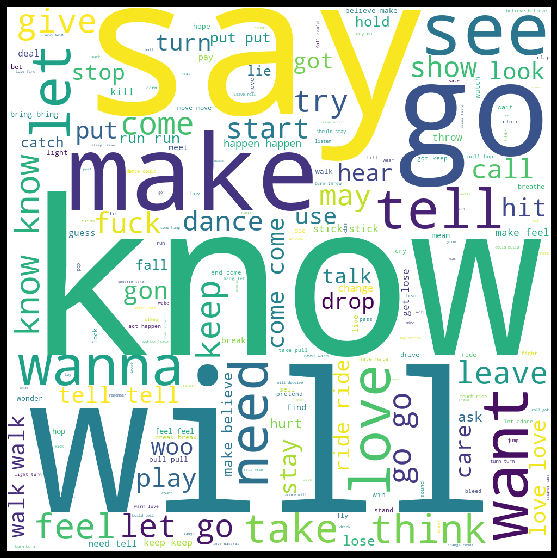

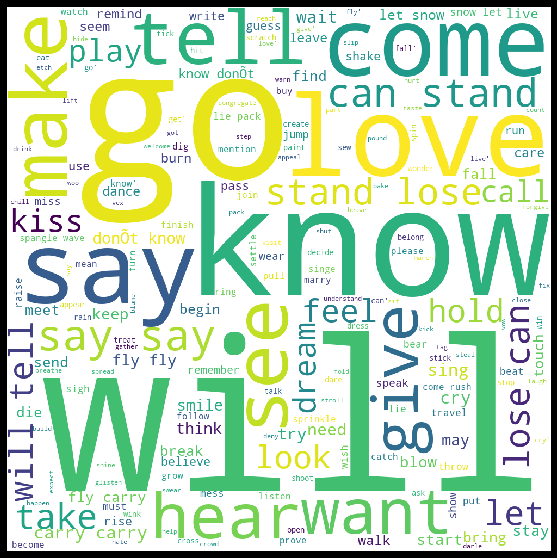

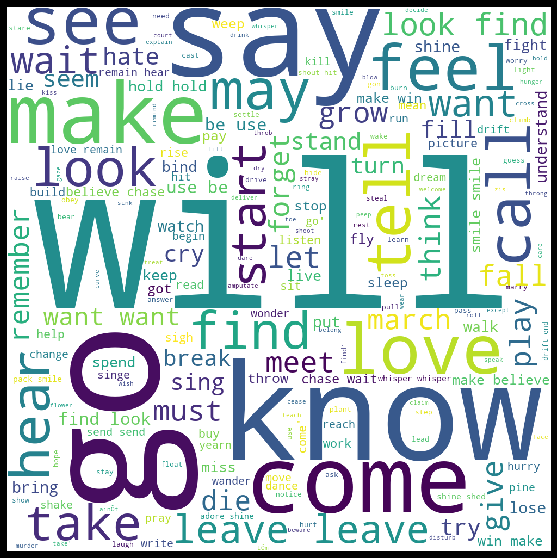

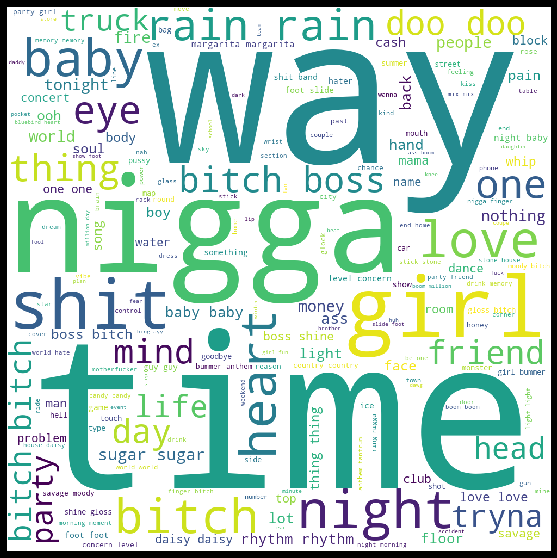

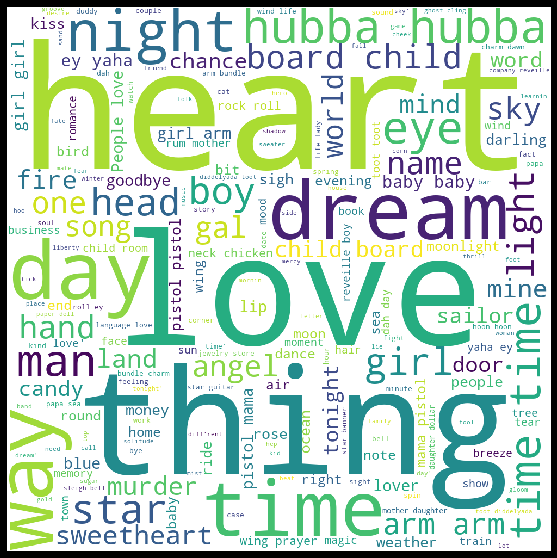

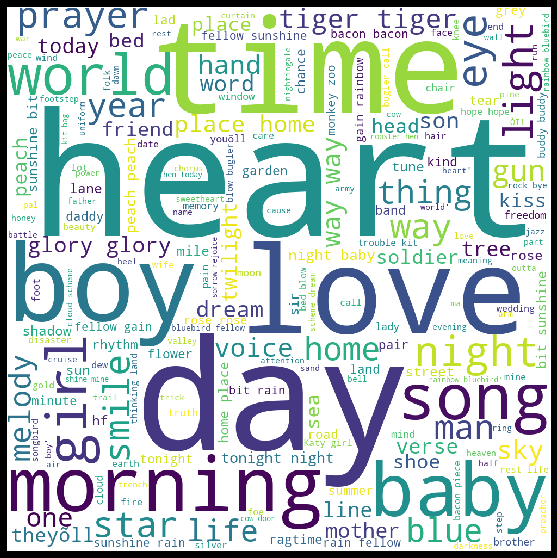

In [181]:
create_wordcloud([nSongsSpacy, wSongsSpacy, pSongsSpacy])

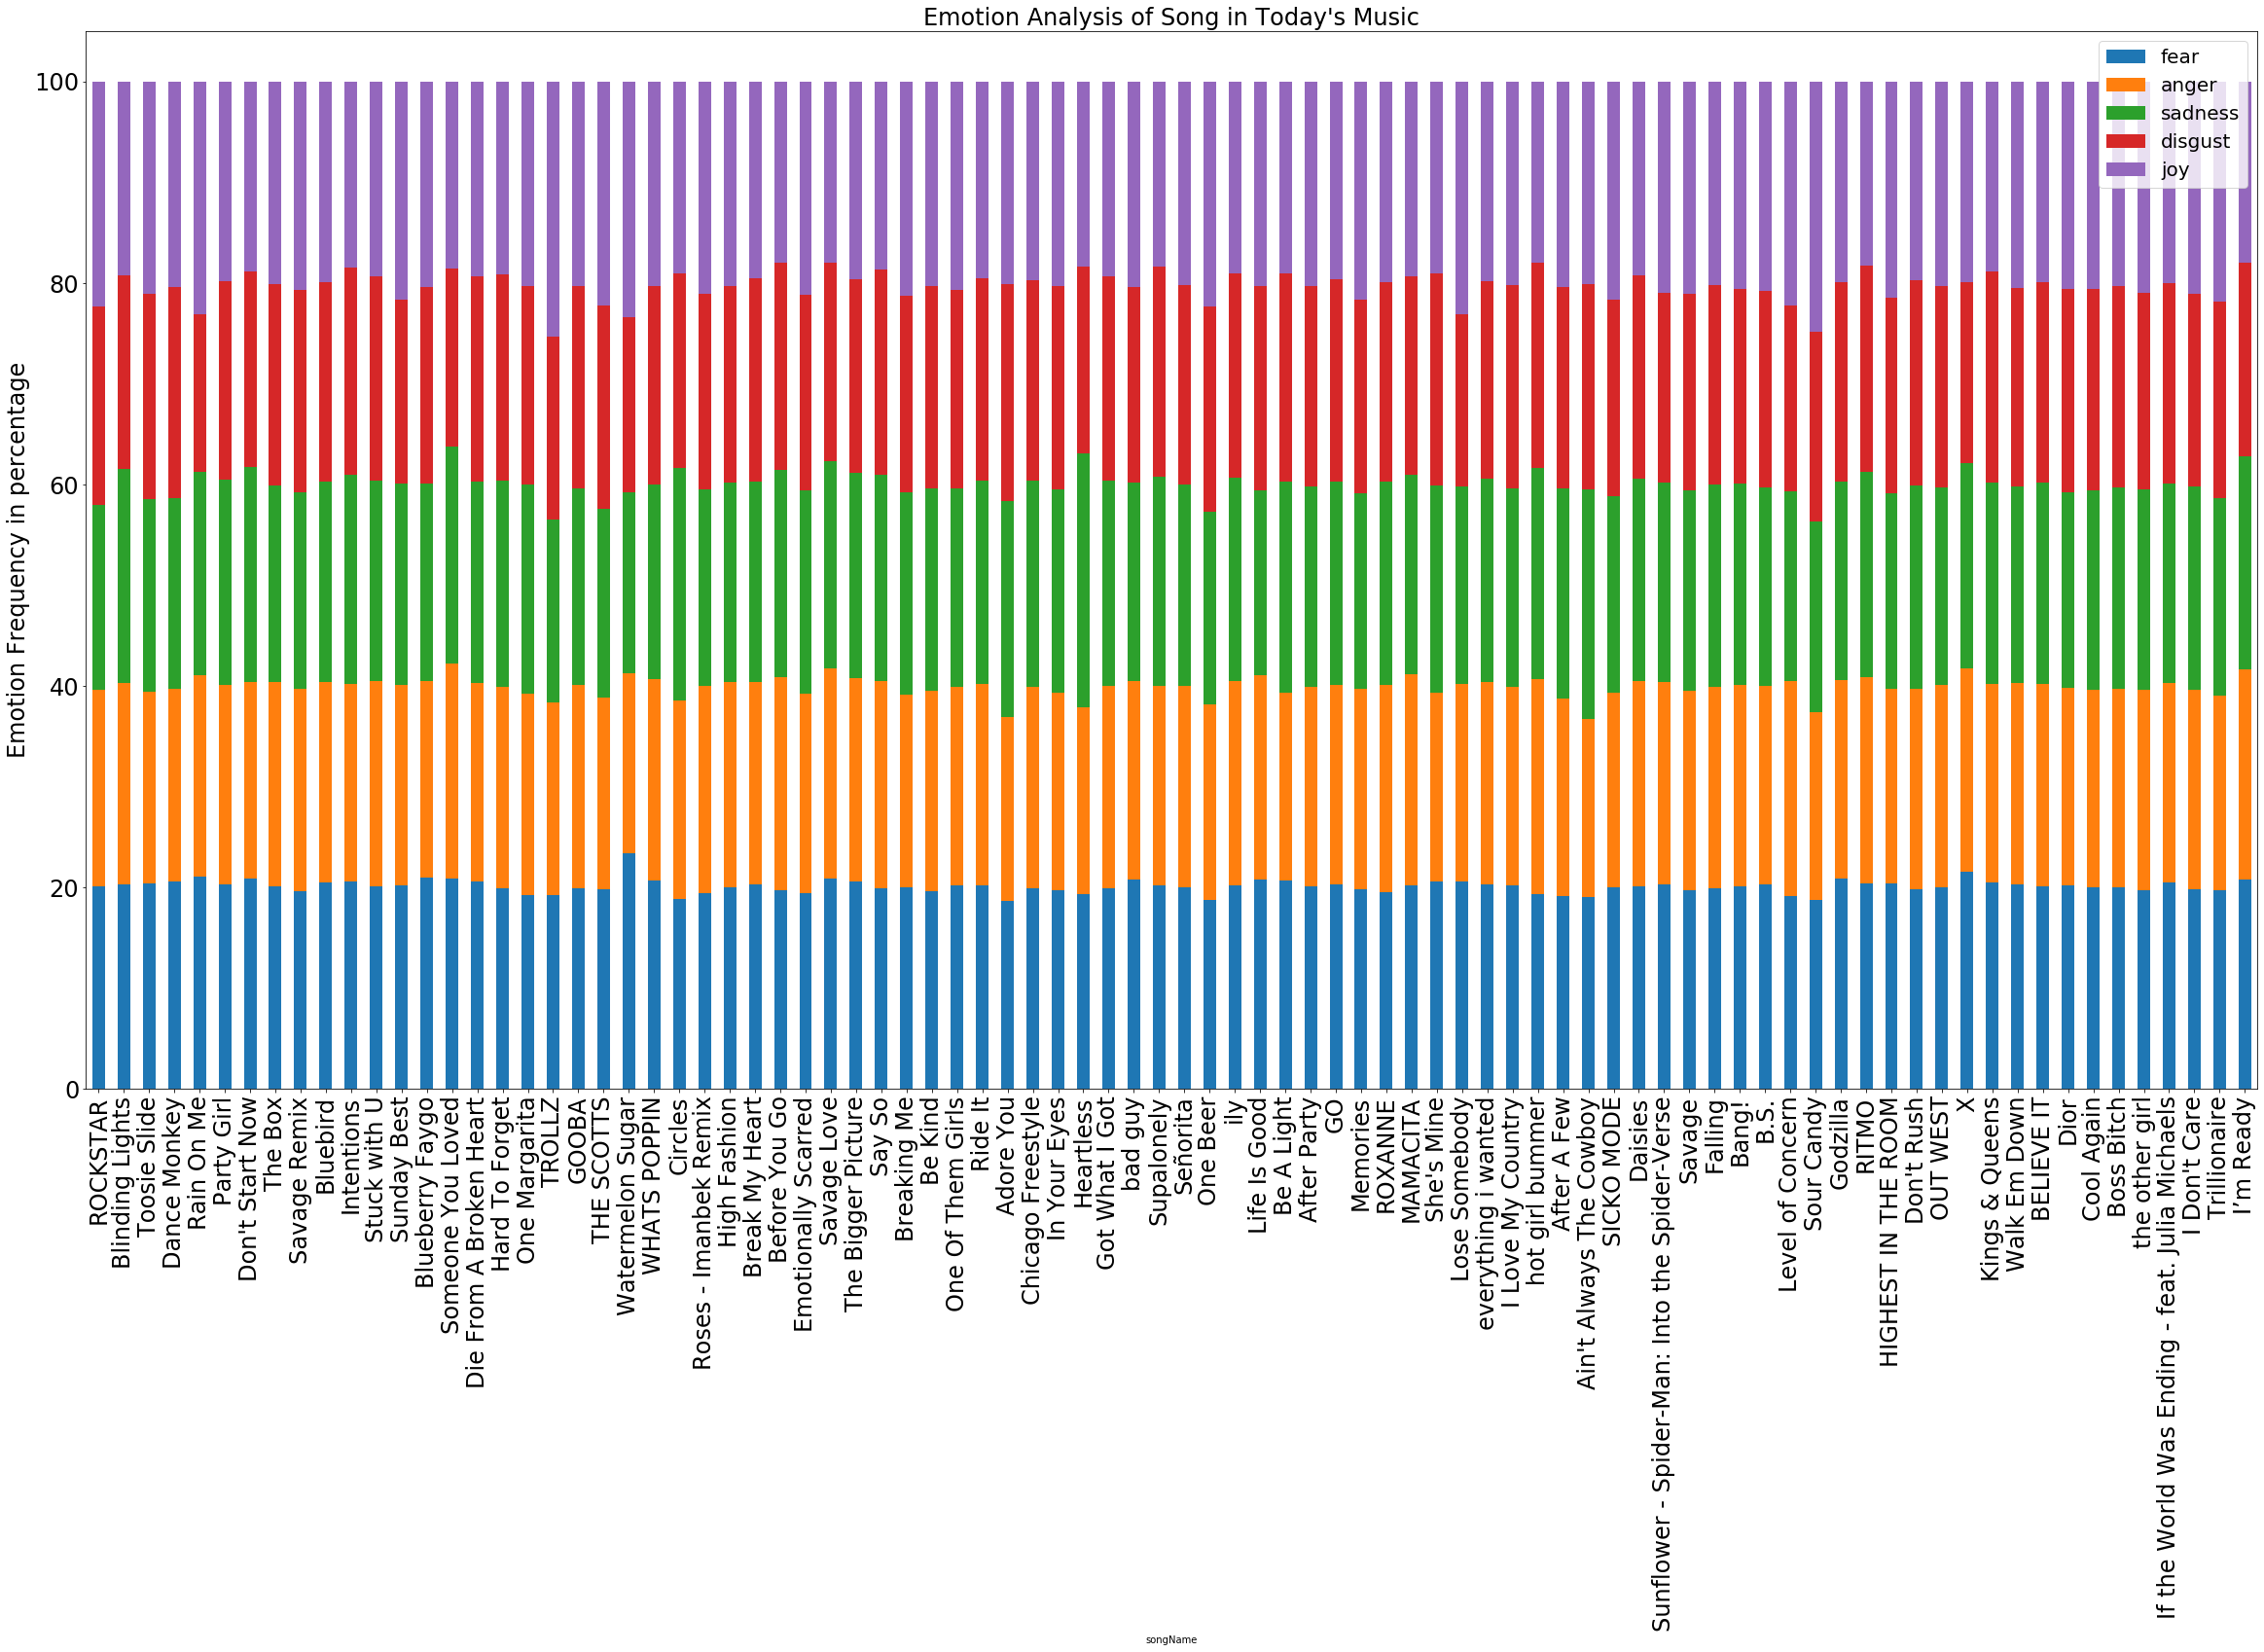

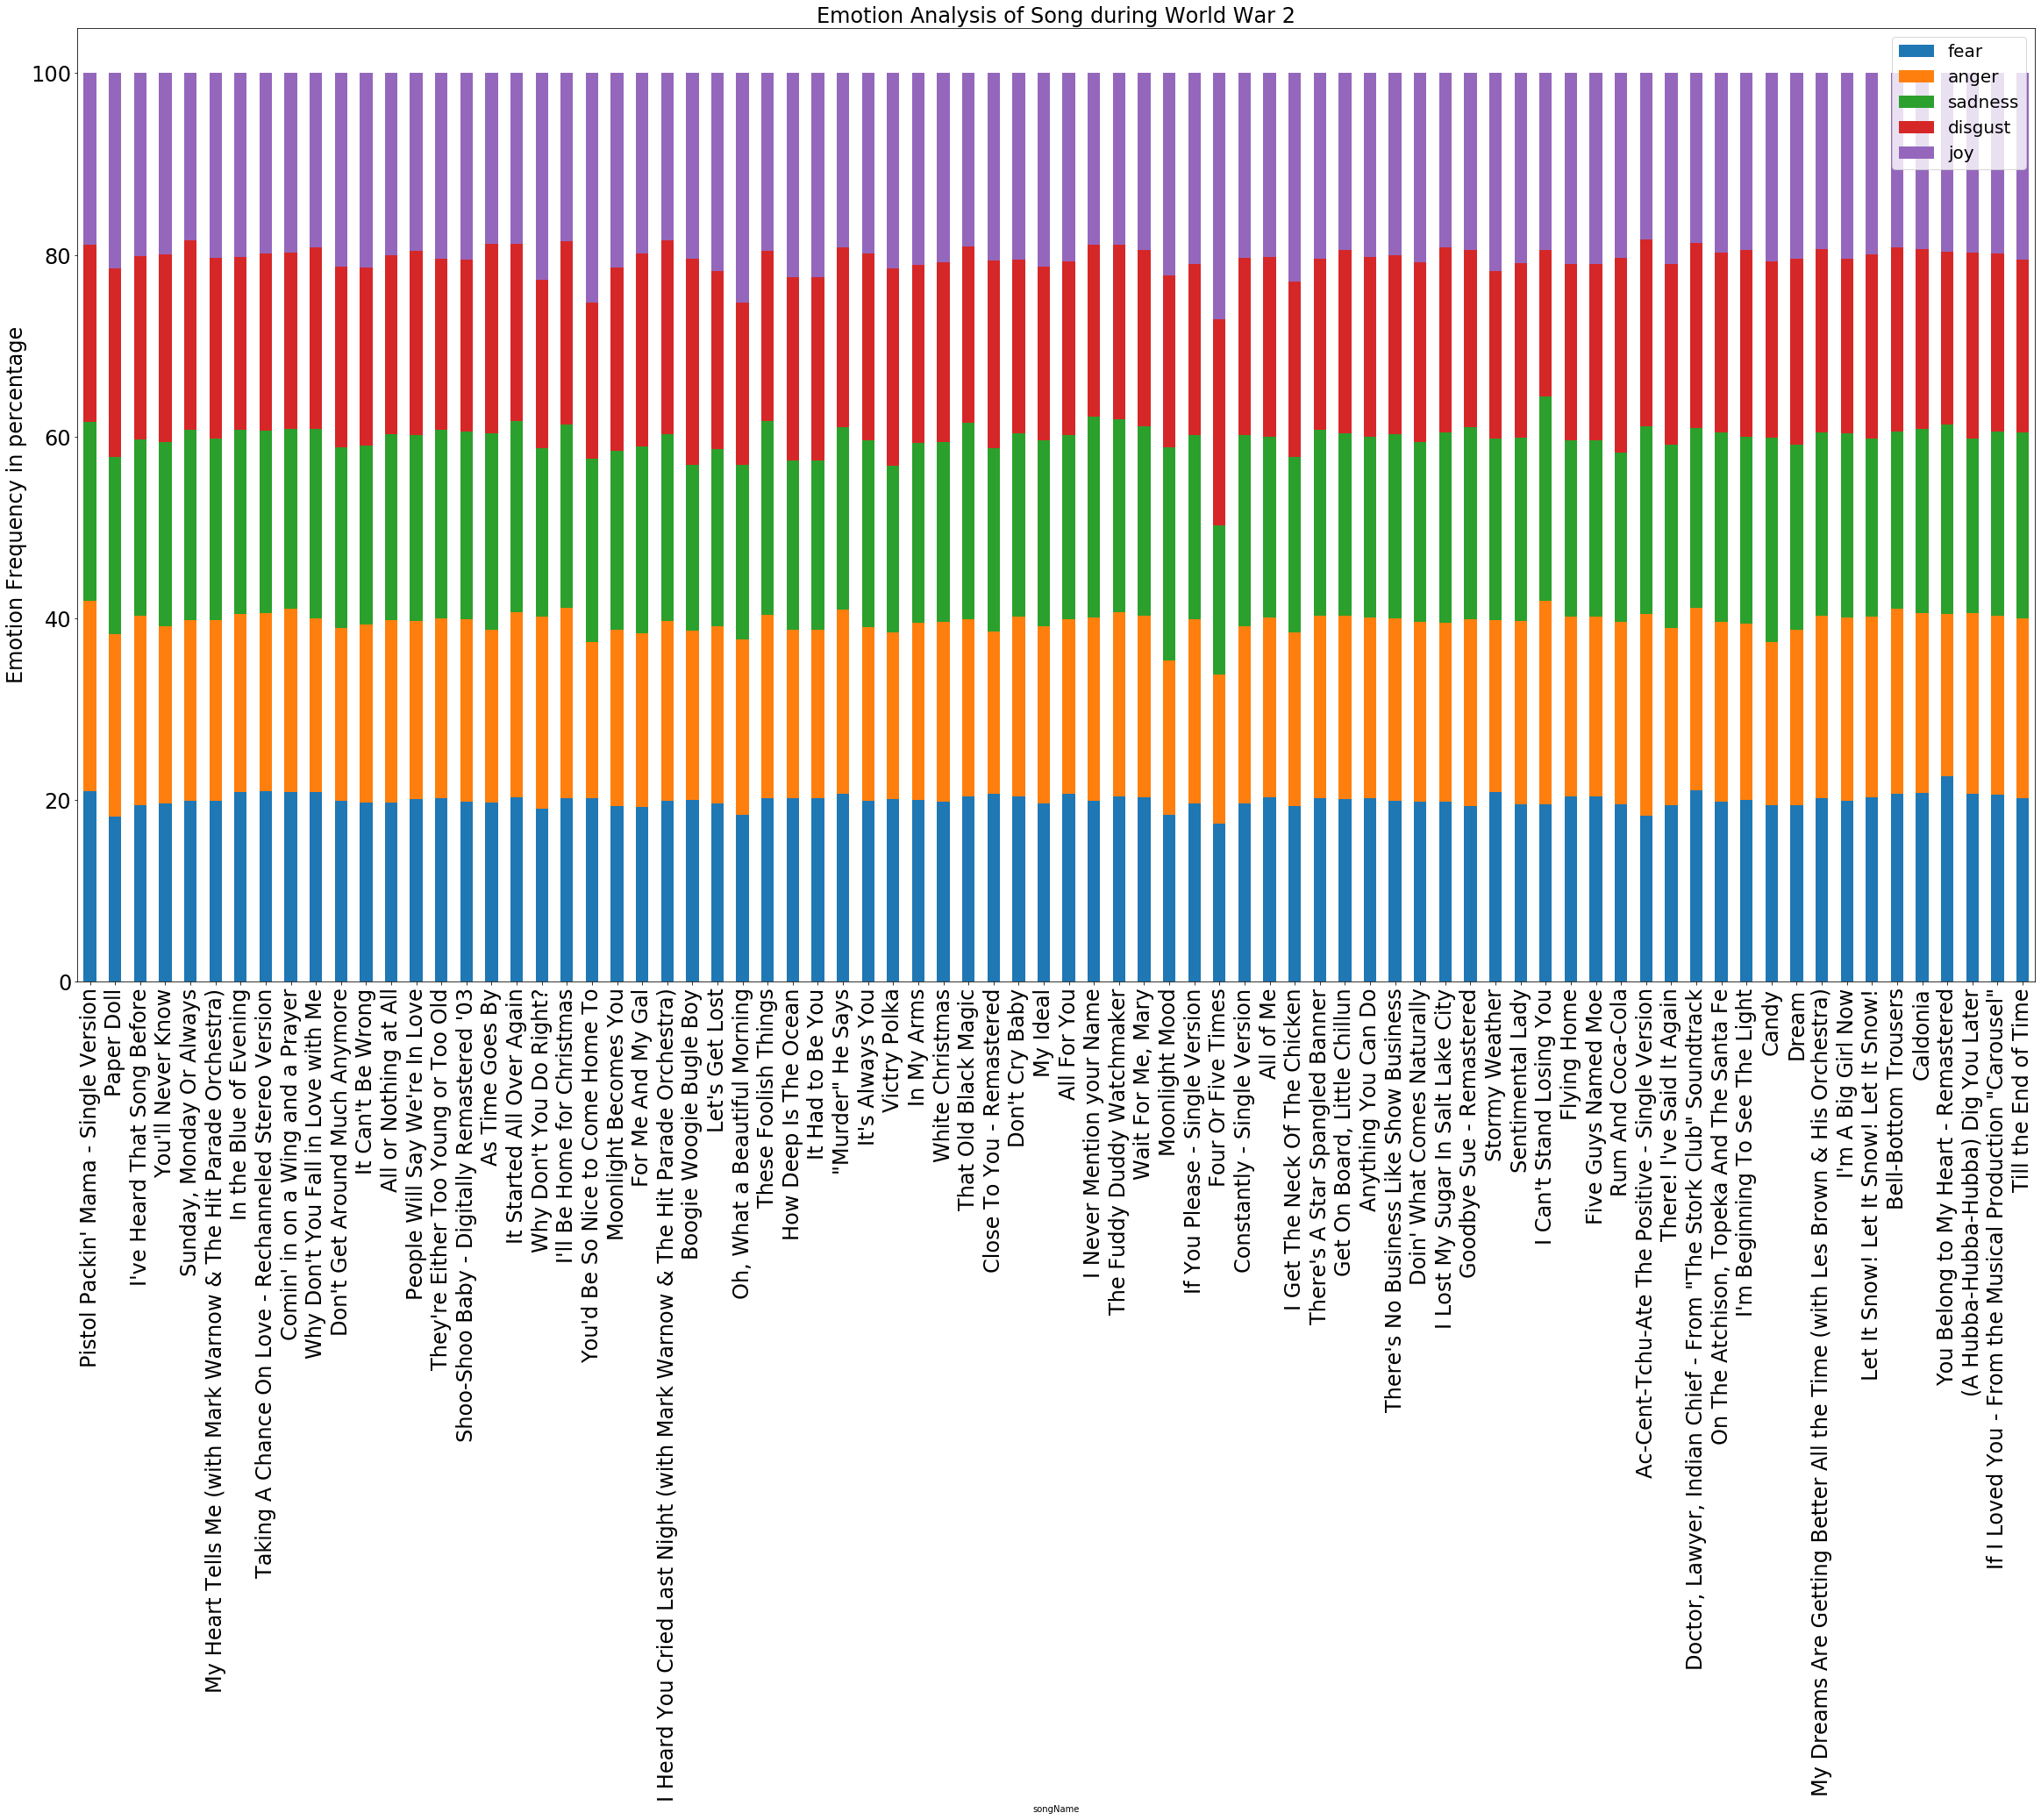

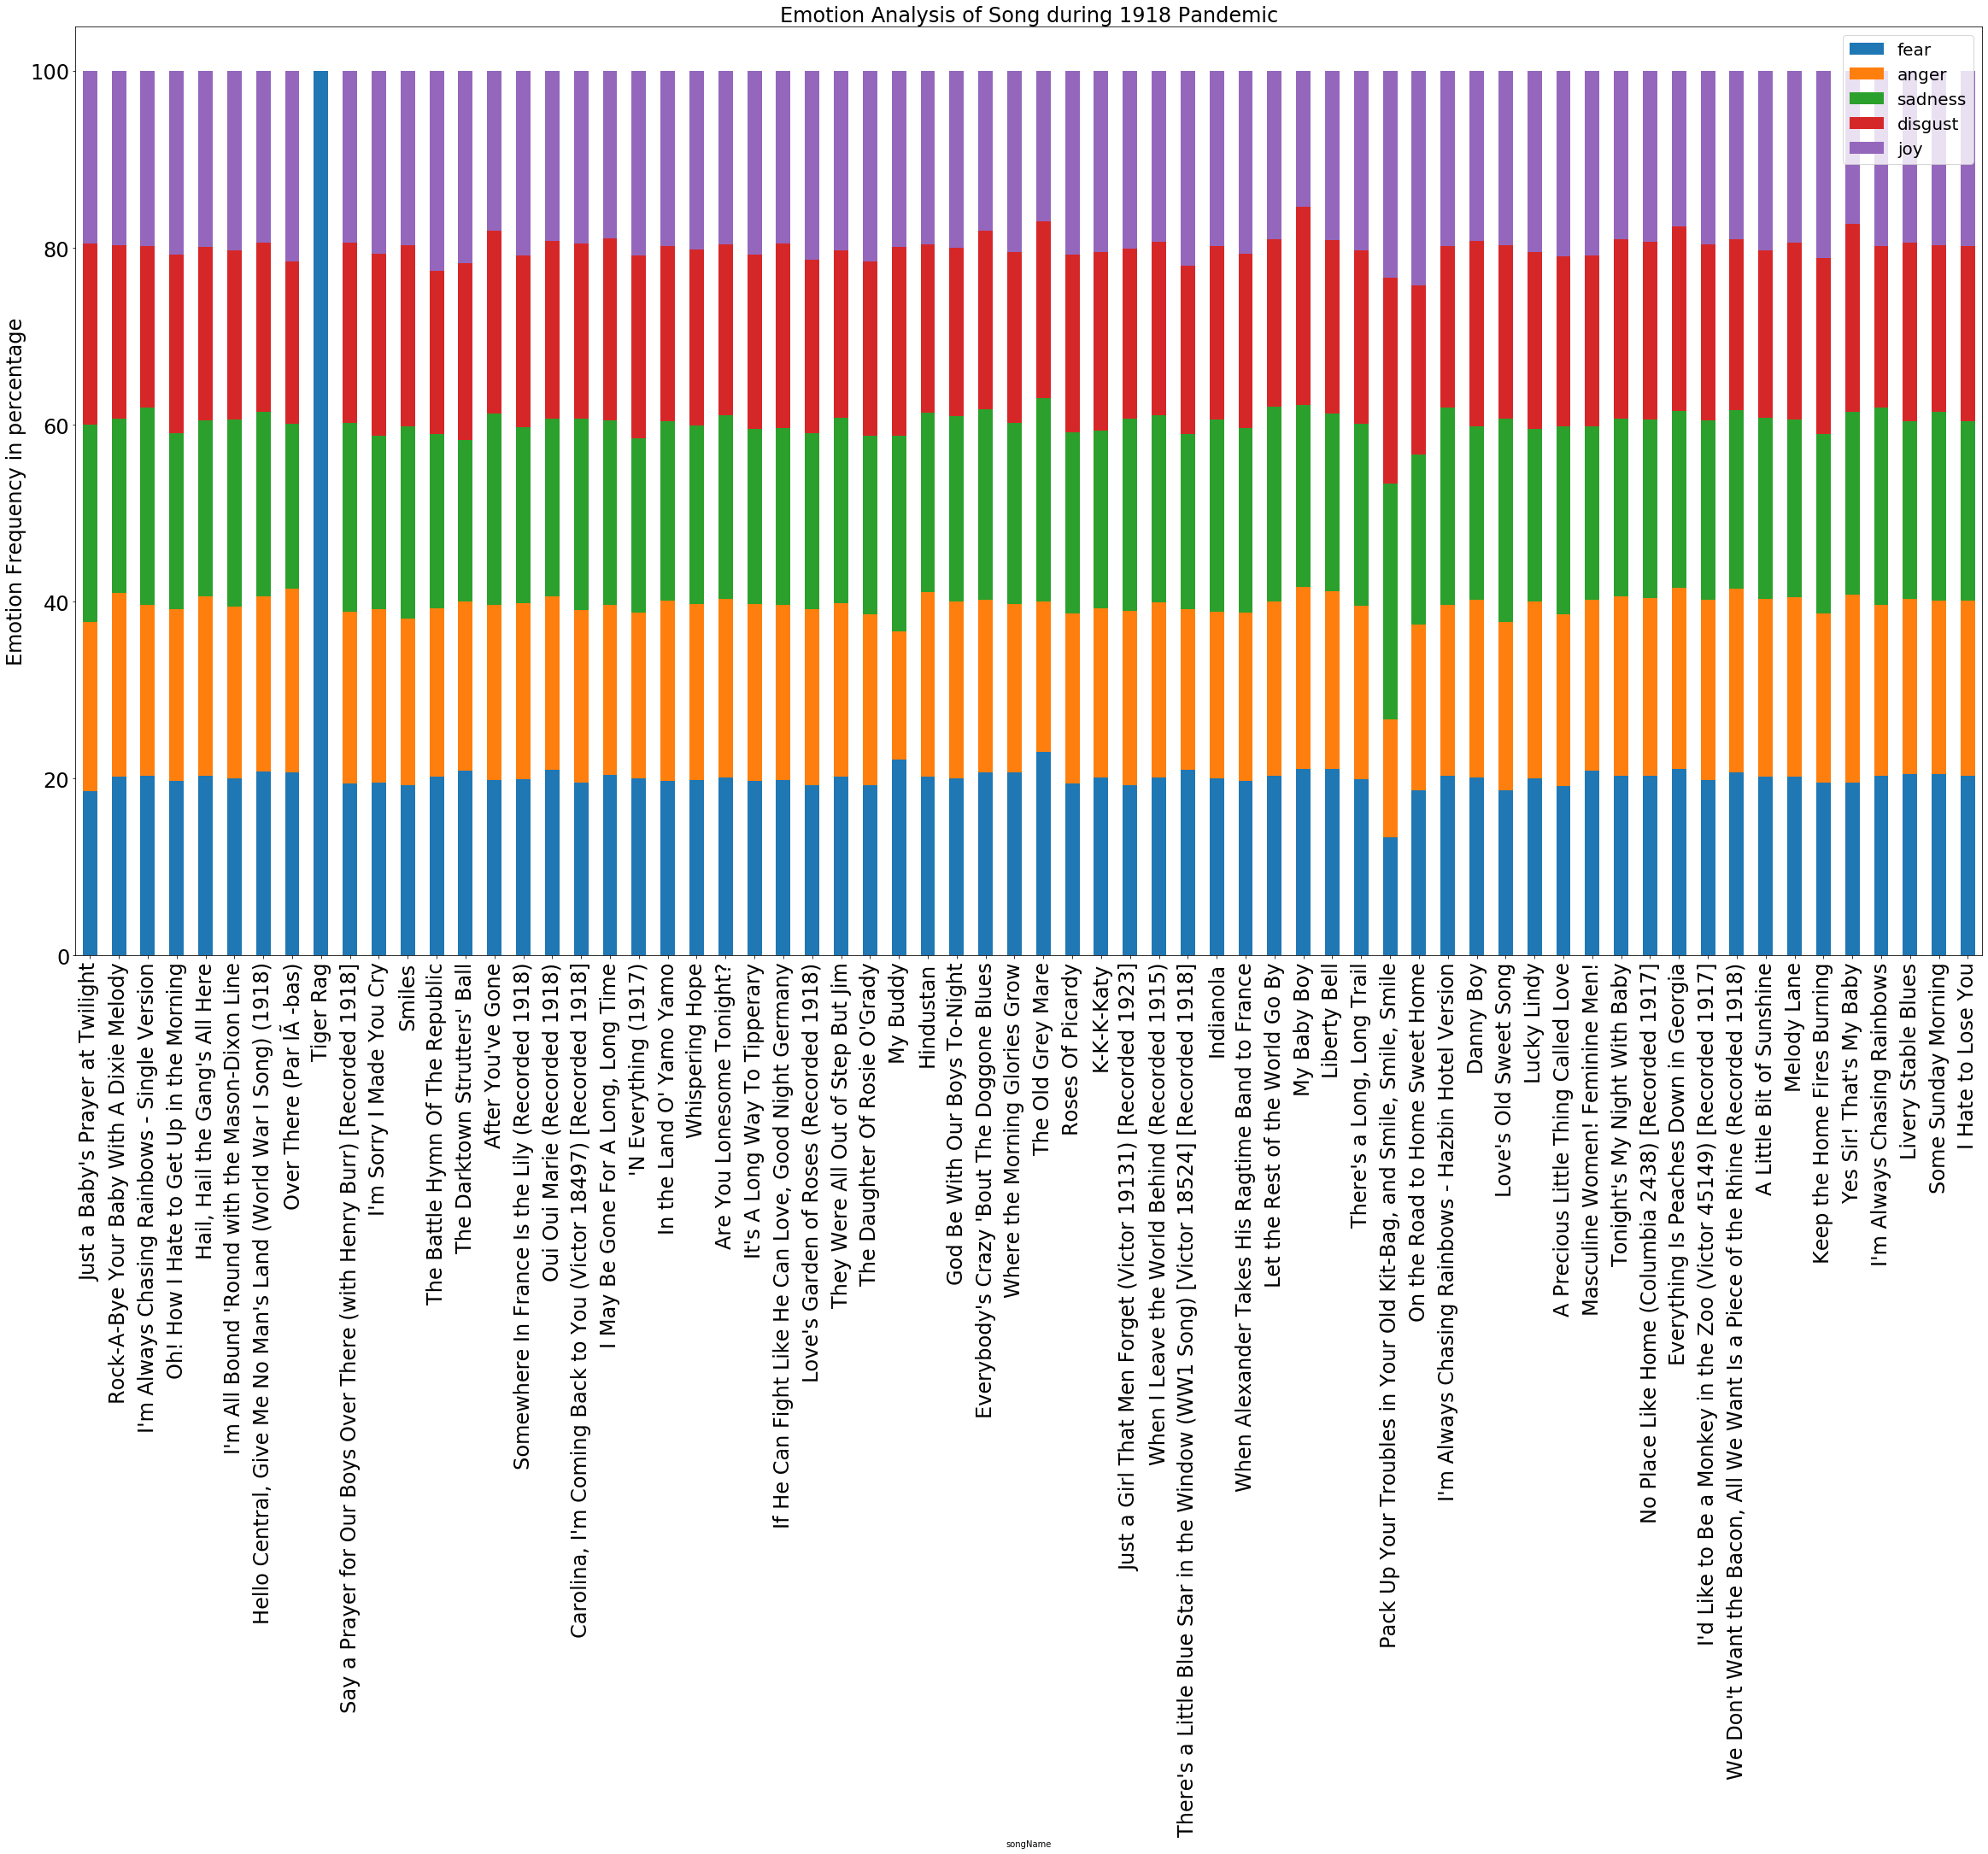

In [246]:
create_emotion_bar([nSongsSpacy, wSongsSpacy, pSongsSpacy])

In [372]:
# From https://shravan-kuchkula.github.io/document_similarity/#plot-a-heatmap-of-cosine-similarity-values
def tokenize_text(book_text):
    TOKEN_PATTERN = r'\s+'
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens

def remove_characters_after_tokenization(tokens):
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation))) 
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens]) 
    return filtered_tokens

def convert_to_lowercase(tokens):
    return [token.lower() for token in tokens if token.isalpha()]

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

def apply_lemmatization(tokens, wnl=WordNetLemmatizer()):
    return [wnl.lemmatize(token) for token in tokens]

def cleanTextBooks(book_texts):
    clean_books = []
    for book in book_texts:
        book_i = tokenize_text(book)
        book_i = remove_characters_after_tokenization(book_i)
        book_i = convert_to_lowercase(book_i)
        book_i = remove_stopwords(book_i)
        book_i = apply_lemmatization(book_i)
        clean_books.append(book_i)
    return clean_books

def plot_heatmap(df_hm, xlabels, ylabels, fileName):
    """
    Given a dataframe containing similarity grid, plot the heatmap
    """
    sns.set(style="white")
    
    # Set up the matplotlib figure
    # (to enlarge the cells, increase the figure size)
    f, ax = plt.subplots(figsize=(18, 18))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_hm, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df_hm, mask=mask, cmap=cmap, center=0.5, 
            xticklabels=xlabels, yticklabels=ylabels,
            square=True, linewidths=.5, fmt='.2f', 
            annot=True, cbar_kws={"shrink": .5}, vmax=1)
    
    ax.set_title("Heatmap of Cosine Similarity Scores").set_fontsize(15)
    ax.set_xlabel("")
    ax.set_ylabel("")
    f.savefig(fileName, bbox_inches="tight")
    
    return ax

In [380]:
def create_cosine_similarity(dataframes):
    for dataframe in dataframes:
        if dataframe.name == 'now':
            fileName1 = 'cosineN.png'
        elif dataframe.name == 'world':
            fileName1 = 'cosineW.png'
        elif dataframe.name == 'pandemic':
            fileName1 = 'cosineP.png'
        documents =[]
        name = []
        count = 0
        for song in dataframe['songName'].values[:15]:
            text = song + '__' + str(count)
            name.append(text)
            count += 1
        for lyric in dataframe['lyrics'].values[:15]:
            documents.append(lyric)
        songDict = dict(zip(name, documents))
        name = list(songDict.keys())

        # create all possible pairs
        pairs = []
        # create a list of tuples
        for i, v in enumerate(name):
            for j in name[i+1:]:
                pairs.append((name[i], j))

        corpus = cleanTextBooks(documents)
        norm_book_corpus = [' '.join(text) for text in corpus]
        vectorizer = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1))

        feature_matrix = vectorizer.fit_transform(norm_book_corpus).astype(float)
        
        pairwise_cosine_similarity = [compute_cosine_similarity(pair) for pair in pairs]

        # create a dataframe
        df = pd.DataFrame({'pair': pairs})
        
        count_vectorizer = CountVectorizer(stop_words='english')
        count_vectorizer = CountVectorizer()
        sparse_matrix = count_vectorizer.fit_transform(documents)

        doc_term_matrix = sparse_matrix.todense()
        df1 = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
        data = cosine_similarity(df1, df1)
        
        # initialize an empty dataframe grid
        df_hm = pd.DataFrame({'ind': range(15), 'cols': range(15), 'vals': pd.Series(np.zeros(15))})

        # convert to a matrix
        df_hm = df_hm.pivot(index='ind', columns='cols').fillna(0)

        # make a copy
        df_temp = df.copy()

        # convert list of tuples into 2 lists
        list1 = []
        list2 = []
        for item1, item2 in df_temp.pair:
            list1.append(item1)
            list2.append(item2)

        # add two columns to df_temp
        df_temp['book1'] = list1
        df_temp['book2'] = list2

        # drop the pair as it not needed
        df_temp.drop('pair', axis=1, inplace=True)

        # extract index so that you can construct pairs
        df_temp['book1'] = df_temp['book1'].apply(lambda x: int(x.split('__')[-1]))
        df_temp['book2'] = df_temp['book2'].apply(lambda x: int(x.split('__')[-1]))

        # create tuples (0, 1, similarity)
        df_temp['pairs'] = list(zip(df_temp.book1, df_temp.book2))

        # to get lower diagnol, swap the rows and cols.
        for row, col in df_temp.pairs:
            df_hm.iloc[col, row] = data[row][col]
        ax = plot_heatmap(df_hm, name, name, fileName1)

0.10594035490867607
0.14785441579145508
0.031300800581424905
0.0463198131560297
0.10331011892256989
0.04398878389338816
0.2199200078486472
0.141988417874841
0.0969177014336145
0.14070732085612997
0.08686075849676342
0.05732460308987518
0.22626606726569143
0.07651011195832477
0.08280678057195237
0.17426320643066384
0.04490975255258388
0.09641811330537098
0.08394577813698387
0.04768350583767038
0.10649340768385224
0.1592259683027388
0.06509629484175677
0.12040171917639385
0.050457548208670766
0.07140425381552543
0.08028455856113378
0.14059651117814176
0.018108557941623697
0.06717450772297494
0.13801873324550828
0.08636380890166628
0.10981550242947363
0.05703476220505724
0.06704529499600556
0.05609651485158234
0.09440961091979364
0.13324142818131057
0.04615515484826148
0.01407225614945461
0.06923201141730151
0.04300281990882632
0.07030048748327565
0.07125305696340815
0.08671156975873243
0.09142654931071707
0.04800552127969792
0.03234548255199241
0.059767980392736425
0.03595357677269526
0.

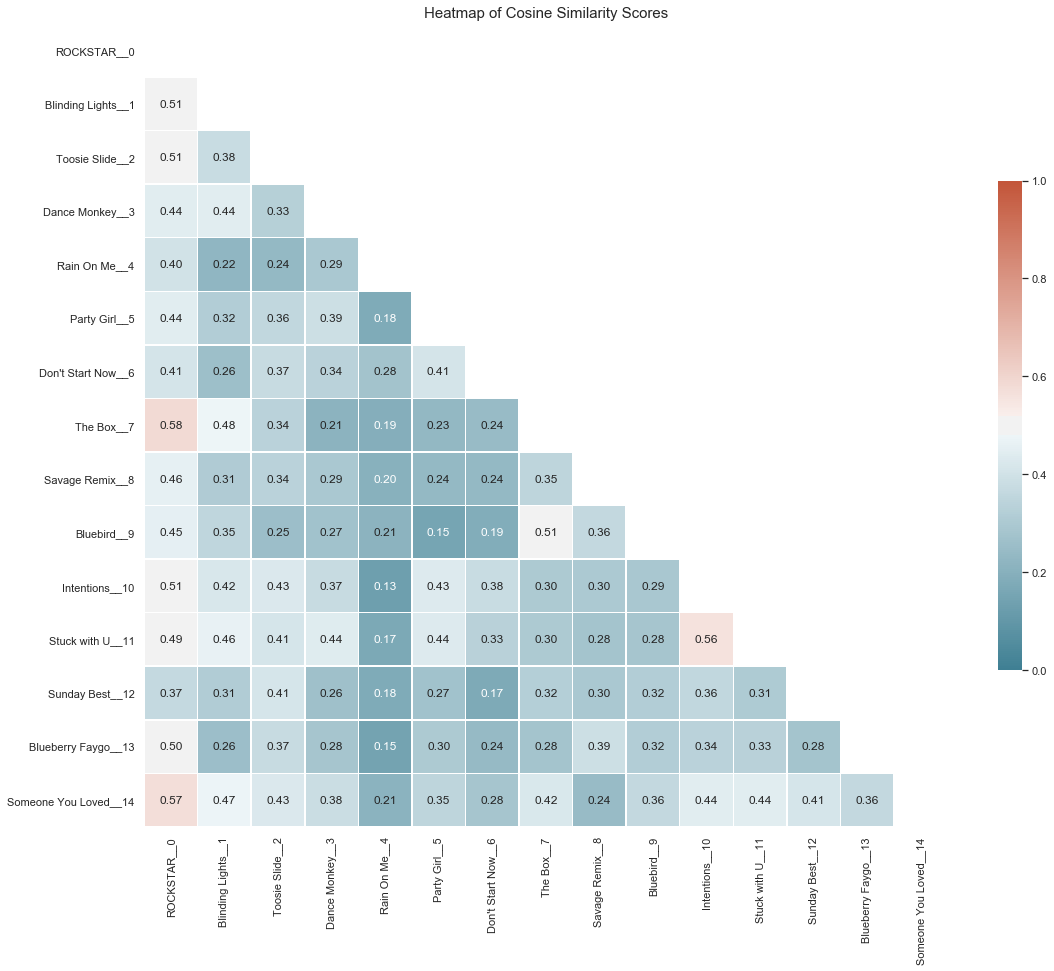

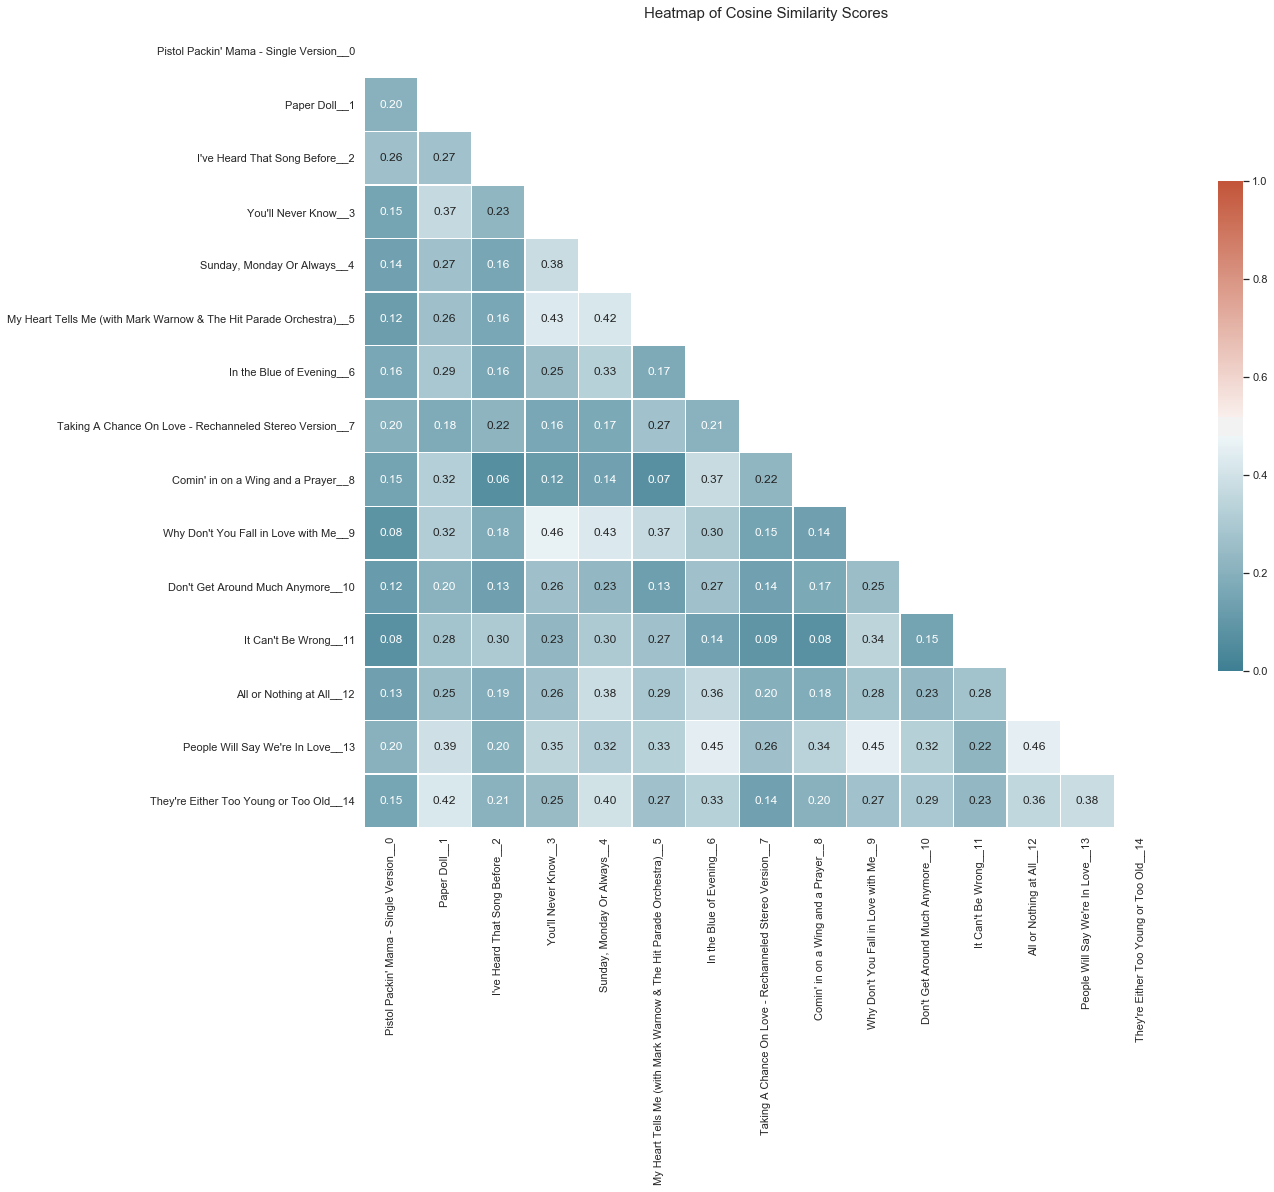

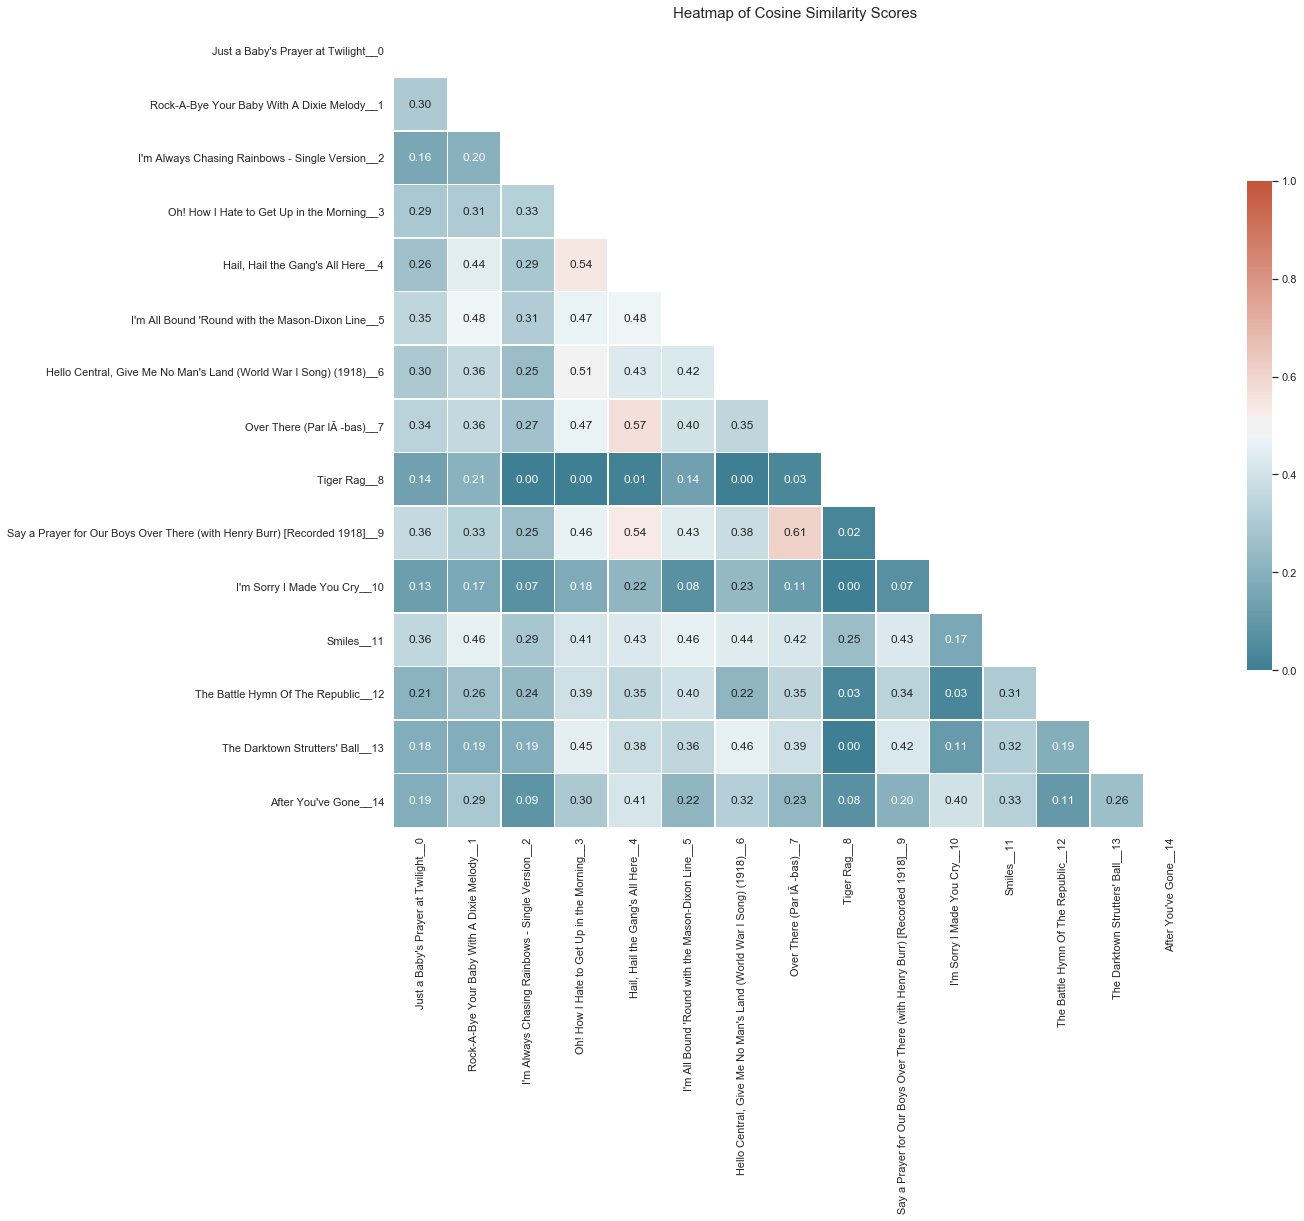

In [381]:
create_cosine_similarity([nSongsSpacy, wSongsSpacy, pSongsSpacy])